In [ ]:
라이브러리 임포트

In [6]:
import cv2
import numpy as np
from matplotlib import pylab as pylab

from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform

from skimage.util import img_as_float
from skimage.exposure import rescale_intensity
from skimage.measure import ransac

In [ ]:
Determinant of Hessian(DoH)

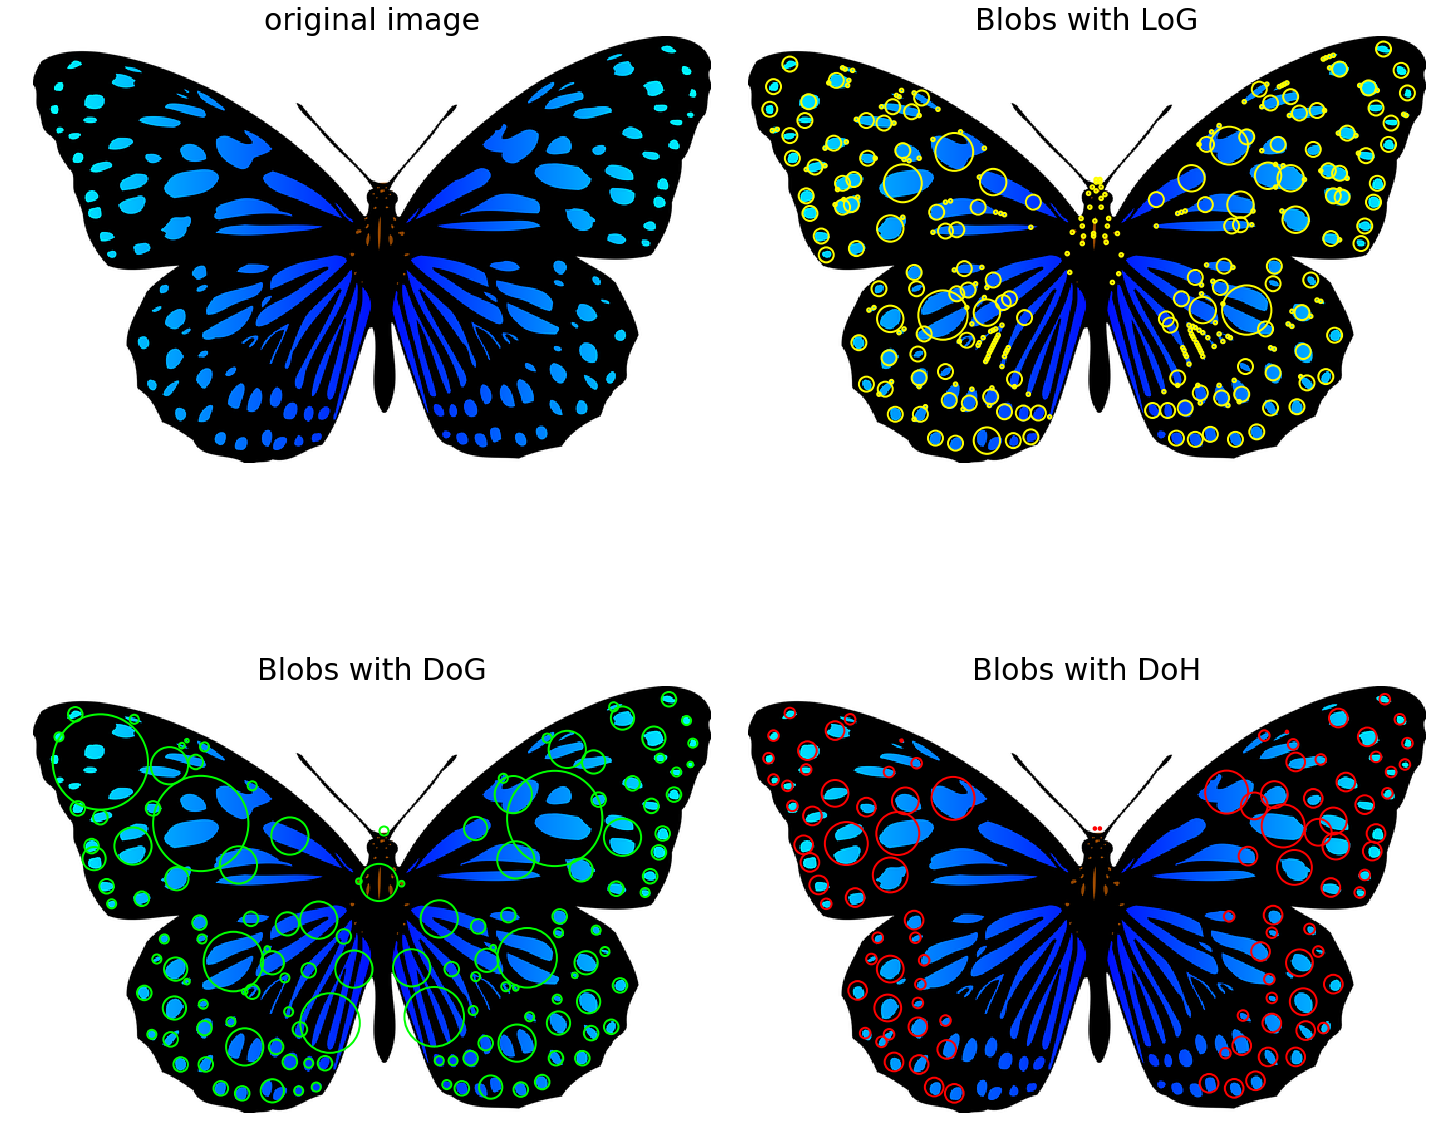

In [7]:
from skimage.feature import blob_dog, blob_log, blob_doh

im = imread('../images/butterfly.png')
im_gray = rgb2gray(im)

log_blobs = blob_log(im_gray, max_sigma=30, num_sigma=10, threshold=.1)
dog_blobs = blob_dog(im_gray, max_sigma=30, threshold=0.1)
log_blobs[:, 2] = np.sqrt(2) * log_blobs[:, 2]
dog_blobs[:, 2] = np.sqrt(2) * dog_blobs[:, 2]
doh_blobs = blob_doh(im_gray, max_sigma=30, threshold=0.005)
list_blobs = [log_blobs, dog_blobs, doh_blobs]

colors, titles = ['yellow', 'lime', 'red'], ['LoG','DoG', 'DoH']
fig, axes = pylab.subplots(2, 2, figsize=(20, 20))
axes = axes.ravel()
axes[0].imshow(im, interpolation='nearest')
axes[0].set_title('original image', size=30), axes[0].set_axis_off()

for i, blobs in enumerate(list_blobs):
    axes[i+1].imshow(im), axes[i+1].set_title('Blobs with ' + titles[i], size=30)
    for (y, x, row) in blobs:
        col = pylab.Circle( (x, y), row, color=colors[i], linewidth=2, fill=False)
        axes[i+1].add_patch(col), axes[i+1].set_axis_off()
        
pylab.tight_layout()
pylab.show()

In [ ]:
Scikit-image로 HOG 서술자 계산

C:\Users\bae22\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


(256, 256) 2048


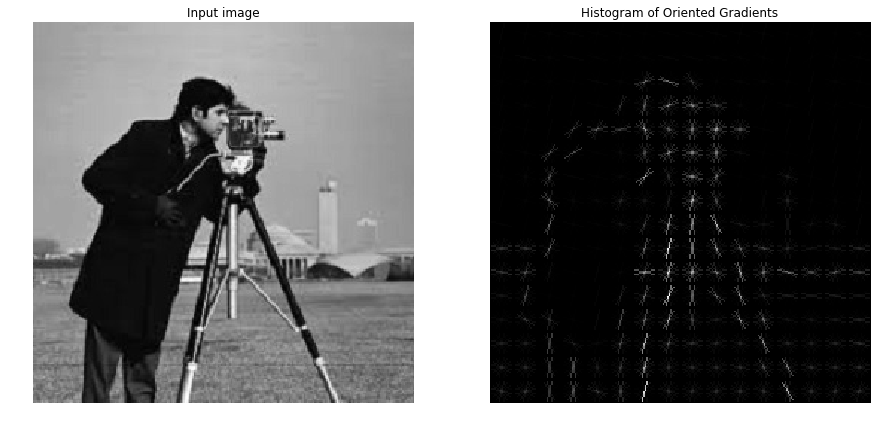

In [5]:
# HOG 서술자 계산하고 시각화
from skimage.feature import hog

image = rgb2gray(imread('../images/cameraman.jpg'))
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), \
                    cells_per_block=(1, 1), visualize=True)
hog_image_rescaled = rescale_intensity(hog_image, in_range=(0,10))
print(image.shape, len(fd)) # ((256L, 256L), 2048)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(15, 10))
axes1.axis('off'), axes1.imshow(image, cmap='gray')
axes1.set_title('Input image')

# 히스토그램 크기 재조정
axes2.axis('off'), axes2.imshow(hog_image_rescaled, cmap='gray')
axes2.set_title('Histogram of Oriented Gradients')
pylab.show()

In [ ]:
Opencv와 opencv-contrib 사용

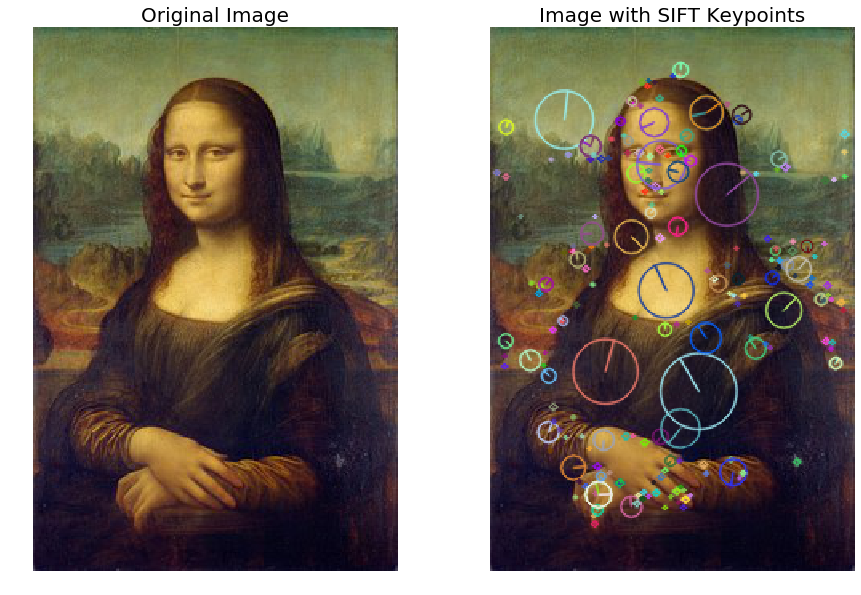

In [19]:
im = cv2.imread('../images/monalisa.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()

kp = sift.detect(gray, None) 							# SIFT 키포인트 검출
flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
im1 = cv2.drawKeypoints(im,kp, None, flags=flags)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(15, 10))
axes1.axis('off'), axes1.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
axes1.set_title('Original Image', size=20)
axes2.axis('off'), axes2.imshow(cv2.cvtColor(im1,cv2.COLOR_BGR2RGB))
axes2.set_title('Image with SIFT Keypoints', size=20)
pylab.show()

kp, des = sift.detectAndCompute(gray,None) 				# SIFT 서술자 계산

In [ ]:
Scikit-image를 사용한 BRIEF 이진 서술자와 영상 매칭

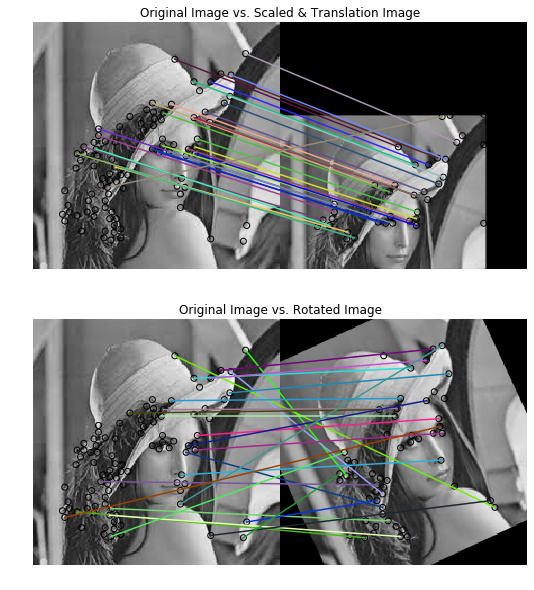

In [28]:
from skimage import transform 
from skimage.feature import (match_descriptors, corner_peaks, \
                             corner_harris, plot_matches, BRIEF)
img1 = rgb2gray(imread('../images/lena.jpg'))
affine_trans = AffineTransform(scale=(1.2, 1.2), translation=(0,-100))
img2 = transform.warp(img1, affine_trans)
img3 = transform.rotate(img1, 25)

coords1, coords2, coords3 = corner_harris(img1), corner_harris(img2), \
                             corner_harris(img3)
coords1[coords1 > 0.01*coords1.max()] = 1
coords2[coords2 > 0.01*coords2.max()] = 1
coords3[coords3 > 0.01*coords3.max()] = 1
keypoints1 = corner_peaks(coords1, min_distance=5)
keypoints2 = corner_peaks(coords2, min_distance=5)
keypoints3 = corner_peaks(coords3, min_distance=5)

extractor = BRIEF()
extractor.extract(img1, keypoints1)
keypoints1, descriptors1 = keypoints1[extractor.mask], extractor.descriptors
extractor.extract(img2, keypoints2)
keypoints2, descriptors2 = keypoints2[extractor.mask],extractor.descriptors
extractor.extract(img3, keypoints3)
keypoints3, descriptors3 = keypoints3[extractor.mask],extractor.descriptors
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

# pylab.subplot(211), pylab.imshow(descriptors1)
# pylab.subplot(212), pylab.imshow(descriptors2)
# pylab.show()
# print(descriptors1.shape, descriptors2.shape)

fig, (axe1, axe2) = pylab.subplots(2, 1, figsize=(10,10))
plot_matches(axe1, img1, img2, keypoints1, keypoints2,matches12)
axe1.axis('off'), axe1.set_title("Original Image vs. Scaled & Translation Image")
plot_matches(axe2, img1, img3, keypoints1, keypoints3, matches13)
axe2.axis('off'), axe2.set_title("Original Image vs. Rotated Image")
pylab.show()

In [ ]:
Scikit-image를 사용하여 ORB 특징 검출기와 이진 서술자를 이용한 매칭

C:\Users\bae22\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


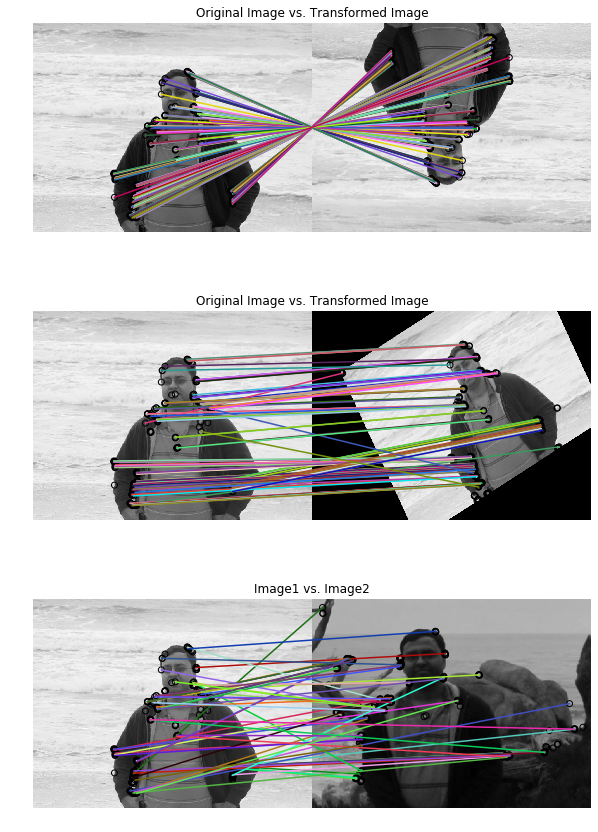

In [27]:
from skimage.feature import (match_descriptors, ORB, plot_matches)

img1 = rgb2gray(imread('../images/me5.jpg'))
img2 = transform.rotate(img1, 180)

affine_trans = AffineTransform(scale=(1.3, 1.1), rotation=0.5, \
                               translation=(0, -200))
img3 = transform.warp(img1, affine_trans)
img4 = rgb2gray(imread('../images/me6.jpg'))
img4 = transform.resize(img4, img1.shape, anti_aliasing=True)

descriptor_extractor = ORB(n_keypoints=200)
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(img4)
keypoints4 = descriptor_extractor.keypoints
descriptors4 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)
matches14 = match_descriptors(descriptors1, descriptors4, cross_check=True)

fig, (axe1, axe2, axe3) = pylab.subplots(3, 1, figsize=(10,15))
plot_matches(axe1, img1, img2, keypoints1, keypoints2, matches12)
axe1.axis('off'), axe1.set_title("Original Image vs. Transformed Image")
plot_matches(axe2, img1, img3, keypoints1, keypoints3, matches13)
axe2.axis('off'), axe2.set_title("Original Image vs. Transformed Image")
plot_matches(axe3, img1, img4, keypoints1, keypoints4, matches14)
axe3.axis('off'), axe3.set_title("Image1 vs. Image2")
pylab.show()

In [ ]:
Python-opencv의 무차별 매칭을 사용한 ORB 특징의 매칭

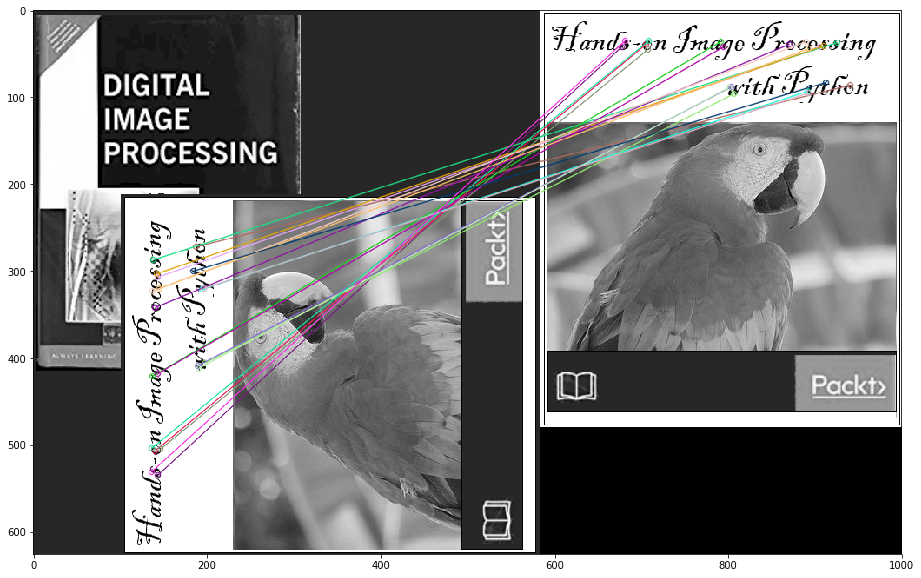

In [8]:
img1 = cv2.imread('../images/books.png',0) # 질의 영상
img2 = cv2.imread('../images/book.png',0) # 훈련 영상

orb = cv2.ORB_create() # ORB 검출기 객체 생성
kp1, des1 = orb.detectAndCompute(img1,None) # 키포인트와 서술자 검색
kp2, des2 = orb.detectAndCompute(img2,None)

# BFMatcher 객체 생성
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2) # 서술자 매칭
matches = sorted(matches, key = lambda x:x.distance) # 거리순 정렬

# 첫 20개 매치 그리기
img3 = cv2.drawMatches(img1, kp1,img2, kp2, matches[:20], None, flags=2)
pylab.figure(figsize=(20,10)), pylab.imshow(img3)
pylab.show()

In [ ]:
OpenCV를 이용한 SIFT 서술자의 무차별 매칭과 비율 테스트

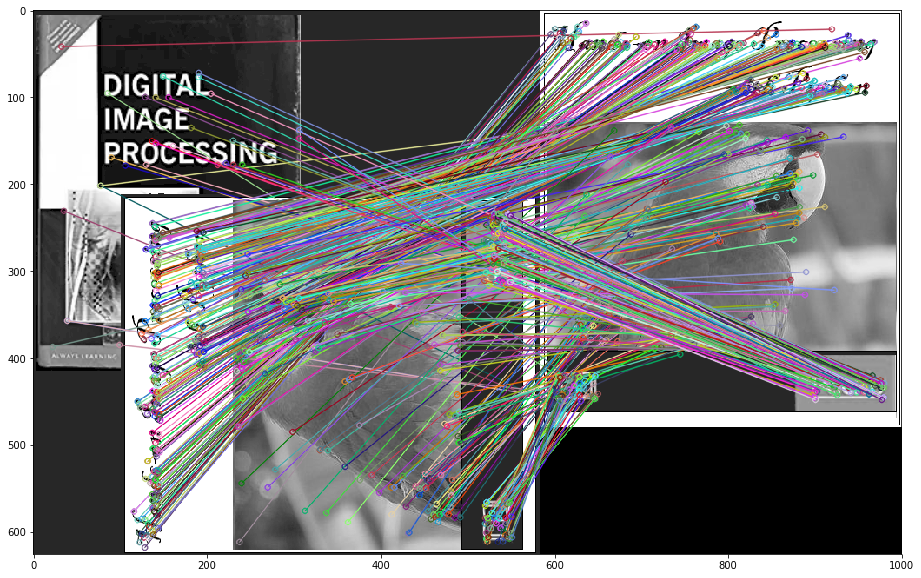

In [10]:
img1 = cv2.imread('../images/books.png',0) # 질의 영상
img2 = cv2.imread('../images/book.png',0) # 훈련 영상

sift = cv2.xfeatures2d.SIFT_create() # SIFT 검출기 객체 생성
kp1, des1 = sift.detectAndCompute(img1,None) # SIFT로 키포인트와 서술자 검색
kp2, des2 = sift.detectAndCompute(img2,None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m1, m2 in matches: # Apply ratio test
    if m1.distance < 0.75*m2.distance:
        good_matches.append([m1])
        
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2,good_matches, None, flags=2)
pylab.figure(figsize=(20,10)), pylab.imshow(img3)
pylab.show()